In [1]:
from mindvision.dataset import Mnist

# 下载并处理MNIST数据集
download_train = Mnist(path="../mnist", split="train", batch_size=32, repeat_num=1, shuffle=True, resize=32, download=True)


In [2]:
download_eval = Mnist(path="../mnist", split="test", batch_size=32, resize=32, download=True)

dataset_train = download_train.run()
dataset_eval = download_eval.run()

In [3]:
from mindvision.classification.models import lenet

network = lenet(num_classes=10, pretrained=False)

In [4]:
import mindspore.nn as nn

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)

In [5]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数，模型训练保存参数的step为1875
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)

In [6]:
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})

# 训练网络模型，并保存为lenet-1_1875.ckpt文件
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.01, 1875)])

Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.287/0.409], time:5.266 ms, lr:0.01000
Epoch time: 5733.385 ms, per step time: 3.058 ms, avg loss: 0.409
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.292/0.064], time:5.933 ms, lr:0.01000
Epoch time: 5476.433 ms, per step time: 2.921 ms, avg loss: 0.064
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.002/0.044], time:5.571 ms, lr:0.01000
Epoch time: 5468.797 ms, per step time: 2.917 ms, avg loss: 0.044
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.044/0.034], time:5.601 ms, lr:0.01000
Epoch time: 5912.776 ms, per step time: 3.153 ms, avg loss: 0.034
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.000/0.027], time:5.773 ms, lr:0.01000
Epoch time: 6170.161 ms, per step time: 3.291 ms, avg loss: 0.027
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.027/0.023], time:5.398 ms, lr:0.01000
Epoch time: 5865.330 ms, per step time: 3.128 ms, avg loss: 0.023
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.001/0.021], time:5.702 ms, lr:0.01000
Epoch time: 5470.310 ms

In [7]:
acc = model.eval(dataset_eval)

print("{}".format(acc))


{'accuracy': 0.9889823717948718}


In [8]:
from mindspore import load_checkpoint, load_param_into_net

# 加载已经保存的用于测试的模型
param_dict = load_checkpoint("./lenet/lenet-1_1875.ckpt")
# 加载参数到网络中
load_param_into_net(network, param_dict)


([],
 ['global_step',
  'learning_rate',
  'momentum',
  'moments.backbone.conv1.weight',
  'moments.backbone.conv2.weight',
  'moments.backbone.fc1.weight',
  'moments.backbone.fc1.bias',
  'moments.backbone.fc2.weight',
  'moments.backbone.fc2.bias',
  'moments.backbone.fc3.weight',
  'moments.backbone.fc3.bias'])

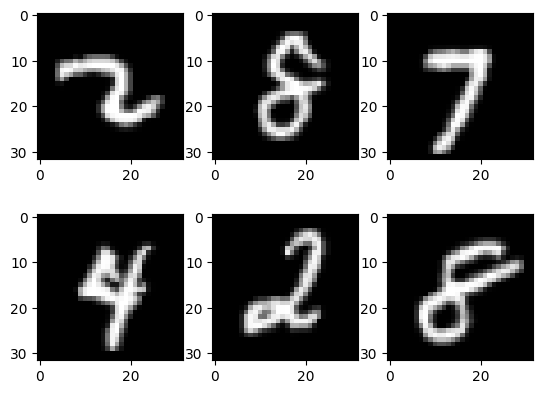

Predicted: "[2 8 7 4 2 8]", Actual: "[2 8 7 4 2 8]"


In [10]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("../mnist", split="train", batch_size=6, resize=32)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}", Actual: "{labels}"')
